In [286]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow import keras
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [168]:
df=pd.read_csv('db.csv')
df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
Age_0to18 = df[(df['age'] >= 0) & (df['age'] <= 18)]
Age_19to30 = df[(df['age'] >= 19) & (df['age'] <= 30)]
Age_31to50 = df[(df['age'] >= 31) & (df['age'] <= 50)]
Age_51to80 = df[(df['age'] >= 51) & (df['age'] <= 80)]


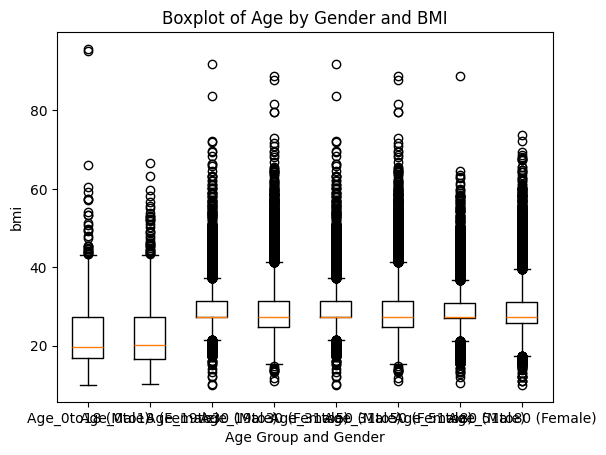

In [4]:

Age_0to18_male_age = Age_0to18[Age_0to18['gender'] == 'Male']['bmi']
Age_0to18_female_age = Age_0to18[Age_0to18['gender'] == 'Female']['bmi']

Age_31to50_male_age = Age_31to50[Age_31to50['gender'] == 'Male']['bmi']
Age_31to50_female_age = Age_31to50[Age_31to50['gender'] == 'Female']['bmi']

Age_31to50_male_age = Age_31to50[Age_31to50['gender'] == 'Male']['bmi']
Age_31to50_female_age = Age_31to50[Age_31to50['gender'] == 'Female']['bmi']

Age_51to80_male_age = Age_51to80[Age_51to80['gender'] == 'Male']['bmi']
Age_51to80_female_age = Age_51to80[Age_51to80['gender'] == 'Female']['bmi']


plt.boxplot([Age_0to18_male_age, Age_0to18_female_age, 
             Age_31to50_male_age, Age_31to50_female_age,
             Age_31to50_male_age, Age_31to50_female_age,
             Age_51to80_male_age, Age_51to80_female_age],
            labels=['Age_0to18 (Male)', 'Age_0to18 (Female)', 
                    'Age_19to30 (Male)', 'Age_19to30 (Female)', 
                    'Age_31to50 (Male)', 'Age_31to50 (Female)', 
                    'Age_51to80 (Male)', 'Age_51to80 (Female)'])
plt.xlabel('Age Group and Gender')
plt.ylabel('bmi')
plt.title('Boxplot of Age by Gender and BMI')
plt.rcParams["figure.figsize"] = (25, 30)
plt.show()


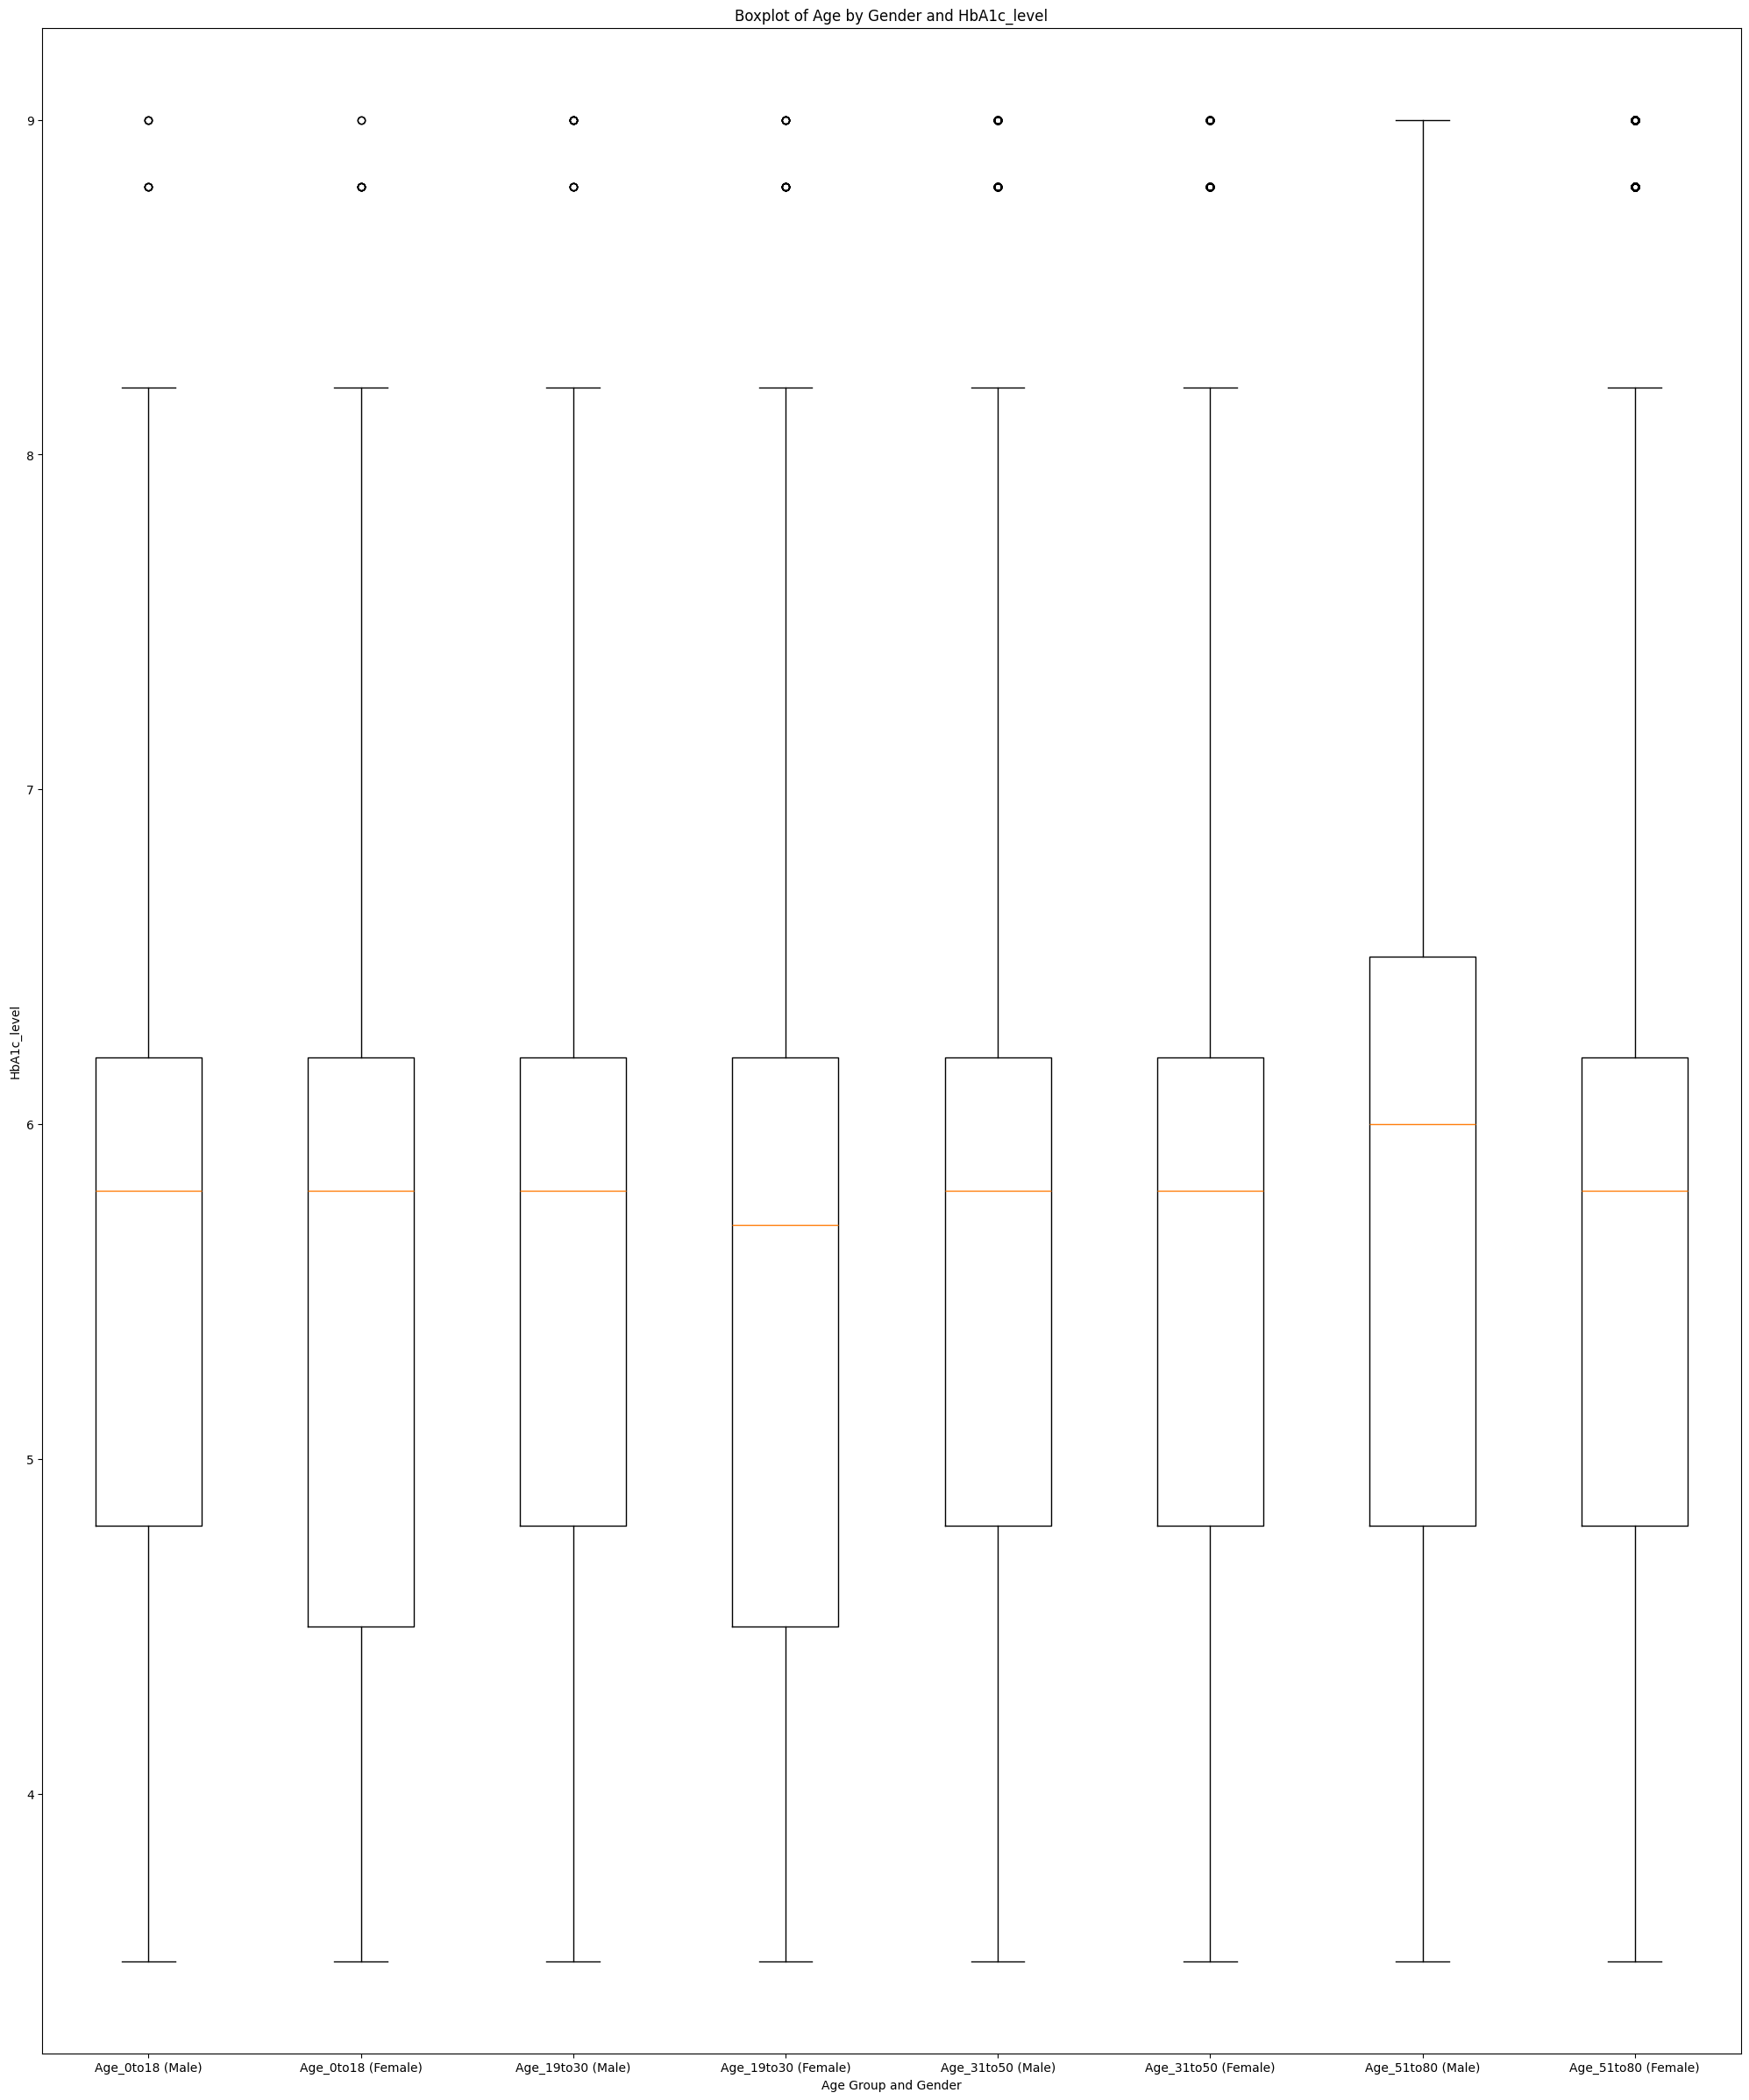

In [5]:
Age_0to18_male_age = Age_0to18[Age_0to18['gender'] == 'Male']['HbA1c_level']
Age_0to18_female_age = Age_0to18[Age_0to18['gender'] == 'Female']['HbA1c_level']

Age_19to30_male_age = Age_19to30[Age_19to30['gender'] == 'Male']['HbA1c_level']
Age_19to30_female_age = Age_19to30[Age_19to30['gender'] == 'Female']['HbA1c_level']

Age_31to50_male_age = Age_31to50[Age_31to50['gender'] == 'Male']['HbA1c_level']
Age_31to50_female_age = Age_31to50[Age_31to50['gender'] == 'Female']['HbA1c_level']

Age_51to80_male_age = Age_51to80[Age_51to80['gender'] == 'Male']['HbA1c_level']
Age_51to80_female_age = Age_51to80[Age_51to80['gender'] == 'Female']['HbA1c_level']


plt.boxplot([Age_0to18_male_age, Age_0to18_female_age, 
             Age_19to30_male_age, Age_19to30_female_age,
             Age_31to50_male_age, Age_31to50_female_age,
             Age_51to80_male_age, Age_51to80_female_age],
            labels=['Age_0to18 (Male)', 'Age_0to18 (Female)', 
                    'Age_19to30 (Male)', 'Age_19to30 (Female)', 
                    'Age_31to50 (Male)', 'Age_31to50 (Female)', 
                    'Age_51to80 (Male)', 'Age_51to80 (Female)'])
plt.xlabel('Age Group and Gender')
plt.ylabel('HbA1c_level')
plt.title('Boxplot of Age by Gender and HbA1c_level')
plt.rcParams["figure.figsize"] = (10,10)
plt.show()

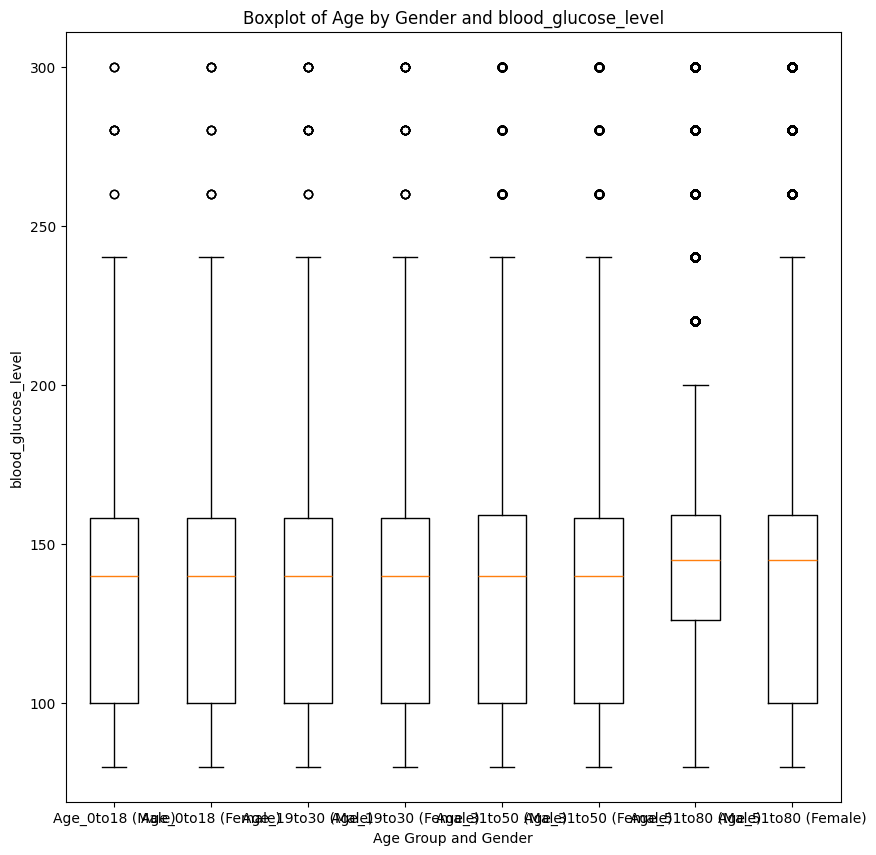

In [6]:
Age_0to18_male_age = Age_0to18[Age_0to18['gender'] == 'Male']['blood_glucose_level']
Age_0to18_female_age = Age_0to18[Age_0to18['gender'] == 'Female']['blood_glucose_level']

Age_19to30_male_age = Age_19to30[Age_19to30['gender'] == 'Male']['blood_glucose_level']
Age_19to30_female_age = Age_19to30[Age_19to30['gender'] == 'Female']['blood_glucose_level']

Age_31to50_male_age = Age_31to50[Age_31to50['gender'] == 'Male']['blood_glucose_level']
Age_31to50_female_age = Age_31to50[Age_31to50['gender'] == 'Female']['blood_glucose_level']

Age_51to80_male_age = Age_51to80[Age_51to80['gender'] == 'Male']['blood_glucose_level']
Age_51to80_female_age = Age_51to80[Age_51to80['gender'] == 'Female']['blood_glucose_level']


plt.boxplot([Age_0to18_male_age, Age_0to18_female_age, 
             Age_19to30_male_age, Age_19to30_female_age,
             Age_31to50_male_age, Age_31to50_female_age,
             Age_51to80_male_age, Age_51to80_female_age],
            labels=['Age_0to18 (Male)', 'Age_0to18 (Female)', 
                    'Age_19to30 (Male)', 'Age_19to30 (Female)', 
                    'Age_31to50 (Male)', 'Age_31to50 (Female)', 
                    'Age_51to80 (Male)', 'Age_51to80 (Female)'])
plt.xlabel('Age Group and Gender')
plt.ylabel('blood_glucose_level')
plt.title('Boxplot of Age by Gender and blood_glucose_level')
plt.rcParams["figure.figsize"] = (20,30)
plt.show()

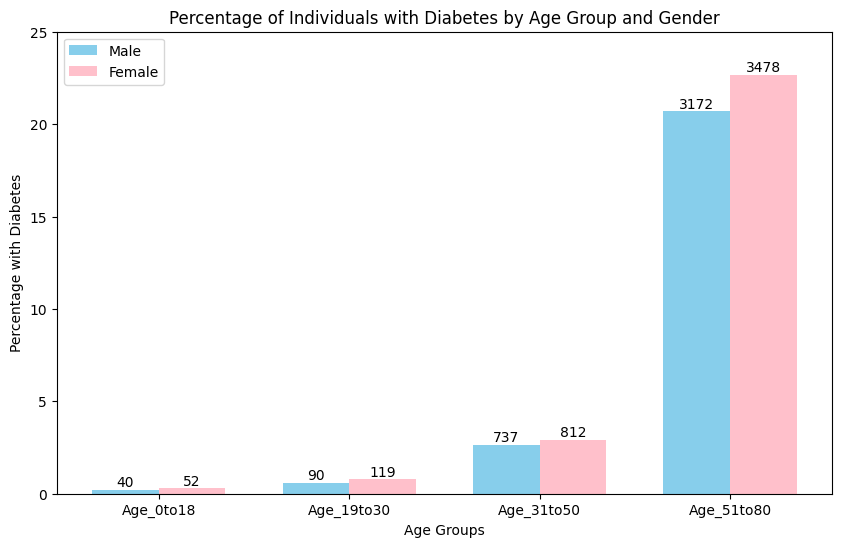

In [7]:
import numpy as np
Age_0to18_male_diabetes_count = len(Age_0to18[(Age_0to18['gender'] == 'Male') & (Age_0to18['diabetes'] == 1)])
Age_0to18_female_diabetes_count = len(Age_0to18[(Age_0to18['gender'] == 'Female') & (Age_0to18['diabetes'] == 1)])
Age_0to18_male_total=len(Age_0to18['gender']=='Male')
Age_0to18_female_total=len(Age_0to18['gender']=='Female')
Age_0to18_male_diabetes_percent = (Age_0to18_male_diabetes_count / Age_0to18_male_total) * 100
Age_0to18_female_diabetes_percent = (Age_0to18_female_diabetes_count / Age_0to18_female_total) * 100

Age_19to30_male_diabetes_count = len(Age_19to30[(Age_19to30['gender'] == 'Male') & (Age_19to30['diabetes'] == 1)])
Age_19to30_female_diabetes_count = len(Age_19to30[(Age_19to30['gender'] == 'Female') & (Age_19to30['diabetes'] == 1)])
Age_19to30_male_total=len(Age_19to30['gender']=='Male')
Age_19to30_female_total=len(Age_19to30['gender']=='Female')
Age_19to30_male_diabetes_percent = (Age_19to30_male_diabetes_count / Age_19to30_male_total) * 100
Age_19to30_female_diabetes_percent = (Age_19to30_female_diabetes_count / Age_19to30_female_total) * 100

Age_31to50_male_diabetes_count = len(Age_31to50[(Age_31to50['gender'] == 'Male') & (Age_31to50['diabetes'] == 1)])
Age_31to50_female_diabetes_count = len(Age_31to50[(Age_31to50['gender'] == 'Female') & (Age_31to50['diabetes'] == 1)])
Age_31to50_male_total=len(Age_31to50['gender']=='Male')
Age_31to50_female_total=len(Age_31to50['gender']=='Female')
Age_31to50_male_diabetes_percent = (Age_31to50_male_diabetes_count / Age_31to50_male_total) * 100
Age_31to50_female_diabetes_percent = (Age_31to50_female_diabetes_count / Age_31to50_female_total) * 100

Age_51to80_male_diabetes_count = len(Age_51to80[(Age_51to80['gender'] == 'Male') & (Age_51to80['diabetes'] == 1)])
Age_51to80_female_diabetes_count = len(Age_51to80[(Age_51to80['gender'] == 'Female') & (Age_51to80['diabetes'] == 1)])
Age_51to80_male_total=len(Age_19to30['gender']=='Male')
Age_51to80_female_total=len(Age_19to30['gender']=='Female')
Age_51to80_male_diabetes_percent = (Age_51to80_male_diabetes_count / Age_51to80_male_total) * 100
Age_51to80_female_diabetes_percent = (Age_51to80_female_diabetes_count / Age_51to80_female_total) * 100

age_groups = ['Age_0to18', 'Age_19to30', 'Age_31to50', 'Age_51to80']
male_diabetes_percentages = [Age_0to18_male_diabetes_percent, Age_19to30_male_diabetes_percent, Age_31to50_male_diabetes_percent, Age_51to80_male_diabetes_percent]
female_diabetes_percentages = [Age_0to18_female_diabetes_percent, Age_19to30_female_diabetes_percent, Age_31to50_female_diabetes_percent, Age_51to80_female_diabetes_percent]
male_totals=[Age_0to18_male_diabetes_count ,Age_19to30_male_diabetes_count,Age_31to50_male_diabetes_count, Age_51to80_male_diabetes_count]
female_totals=[Age_0to18_female_diabetes_count,Age_19to30_female_diabetes_count,Age_31to50_female_diabetes_count,Age_51to80_female_diabetes_count]

bar_width = 0.35
index = np.arange(len(age_groups))

plt.figure(figsize=(10, 6))
bar1 = plt.bar(index - bar_width/2, male_diabetes_percentages, bar_width, color='skyblue', label='Male')
bar2 = plt.bar(index + bar_width/2, female_diabetes_percentages, bar_width, color='pink', label='Female')


for bars, totals in zip([bar1, bar2], [male_totals, female_totals]):
    for bar, total in zip(bars, totals):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{total}', ha='center', va='bottom')

plt.xlabel('Age Groups')
plt.ylabel('Number of Individuals with Diabetes')
plt.xlabel('Age Groups')
plt.ylabel('Percentage with Diabetes')
plt.title('Percentage of Individuals with Diabetes by Age Group and Gender')
plt.xticks(index, age_groups)
plt.legend()
plt.ylim(0, 25)
plt.show()

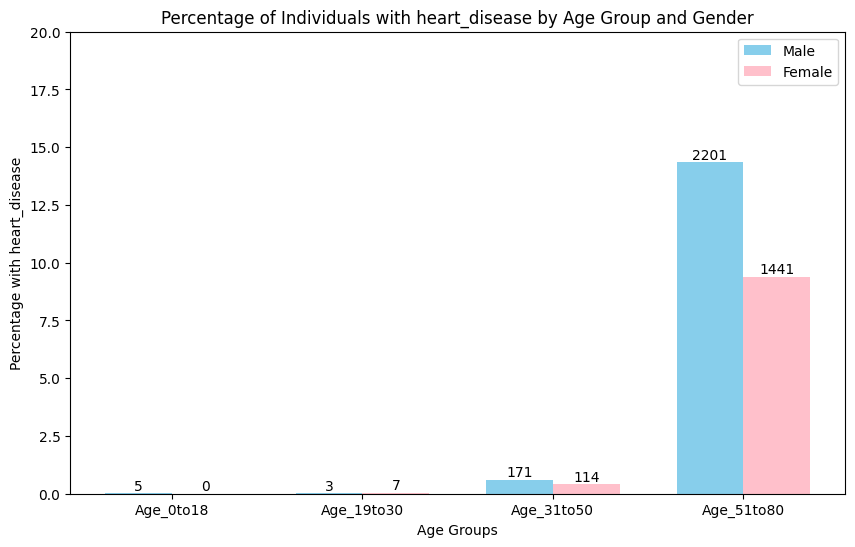

In [8]:
Age_0to18_male_heart_disease_count = len(Age_0to18[(Age_0to18['gender'] == 'Male') & (Age_0to18['heart_disease'] == 1)])
Age_0to18_female_heart_disease_count = len(Age_0to18[(Age_0to18['gender'] == 'Female') & (Age_0to18['heart_disease'] == 1)])
Age_0to18_male_total=len(Age_0to18['gender']=='Male')
Age_0to18_female_total=len(Age_0to18['gender']=='Female')
Age_0to18_male_heart_disease_percent = (Age_0to18_male_heart_disease_count / Age_0to18_male_total) * 100
Age_0to18_female_heart_disease_percent = (Age_0to18_female_heart_disease_count / Age_0to18_female_total) * 100

Age_19to30_male_heart_disease_count = len(Age_19to30[(Age_19to30['gender'] == 'Male') & (Age_19to30['heart_disease'] == 1)])
Age_19to30_female_heart_disease_count = len(Age_19to30[(Age_19to30['gender'] == 'Female') & (Age_19to30['heart_disease'] == 1)])
Age_19to30_male_total=len(Age_19to30['gender']=='Male')
Age_19to30_female_total=len(Age_19to30['gender']=='Female')
Age_19to30_male_heart_disease_percent = (Age_19to30_male_heart_disease_count / Age_19to30_male_total) * 100
Age_19to30_female_heart_disease_percent = (Age_19to30_female_heart_disease_count / Age_19to30_female_total) * 100

Age_31to50_male_heart_disease_count = len(Age_31to50[(Age_31to50['gender'] == 'Male') & (Age_31to50['heart_disease'] == 1)])
Age_31to50_female_heart_disease_count = len(Age_31to50[(Age_31to50['gender'] == 'Female') & (Age_31to50['heart_disease'] == 1)])
Age_31to50_male_total=len(Age_31to50['gender']=='Male')
Age_31to50_female_total=len(Age_31to50['gender']=='Female')
Age_31to50_male_heart_disease_percent = (Age_31to50_male_heart_disease_count / Age_31to50_male_total) * 100
Age_31to50_female_heart_disease_percent = (Age_31to50_female_heart_disease_count / Age_31to50_female_total) * 100

Age_51to80_male_heart_disease_count = len(Age_51to80[(Age_51to80['gender'] == 'Male') & (Age_51to80['heart_disease'] == 1)])
Age_51to80_female_heart_disease_count = len(Age_51to80[(Age_51to80['gender'] == 'Female') & (Age_51to80['heart_disease'] == 1)])
Age_51to80_male_total=len(Age_19to30['gender']=='Male')
Age_51to80_female_total=len(Age_19to30['gender']=='Female')
Age_51to80_male_heart_disease_percent = (Age_51to80_male_heart_disease_count / Age_51to80_male_total) * 100
Age_51to80_female_heart_disease_percent = (Age_51to80_female_heart_disease_count / Age_51to80_female_total) * 100

age_groups = ['Age_0to18', 'Age_19to30', 'Age_31to50', 'Age_51to80']
male_heart_disease_percentages = [Age_0to18_male_heart_disease_percent, Age_19to30_male_heart_disease_percent, Age_31to50_male_heart_disease_percent, Age_51to80_male_heart_disease_percent]
female_heart_disease_percentages = [Age_0to18_female_heart_disease_percent, Age_19to30_female_heart_disease_percent, Age_31to50_female_heart_disease_percent, Age_51to80_female_heart_disease_percent]
male_totals=[Age_0to18_male_heart_disease_count ,Age_19to30_male_heart_disease_count,Age_31to50_male_heart_disease_count, Age_51to80_male_heart_disease_count]
female_totals=[Age_0to18_female_heart_disease_count,Age_19to30_female_heart_disease_count,Age_31to50_female_heart_disease_count,Age_51to80_female_heart_disease_count]

bar_width = 0.35
index = np.arange(len(age_groups))

plt.figure(figsize=(10, 6))
bar1 = plt.bar(index - bar_width/2, male_heart_disease_percentages, bar_width, color='skyblue', label='Male')
bar2 = plt.bar(index + bar_width/2, female_heart_disease_percentages, bar_width, color='pink', label='Female')


for bars, totals in zip([bar1, bar2], [male_totals, female_totals]):
    for bar, total in zip(bars, totals):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{total}', ha='center', va='bottom')

plt.xlabel('Age Groups')
plt.ylabel('Number of Individuals with heart_disease')
plt.xlabel('Age Groups')
plt.ylabel('Percentage with heart_disease')
plt.title('Percentage of Individuals with heart_disease by Age Group and Gender')
plt.xticks(index, age_groups)
plt.legend()
plt.ylim(0, 20)
plt.show()

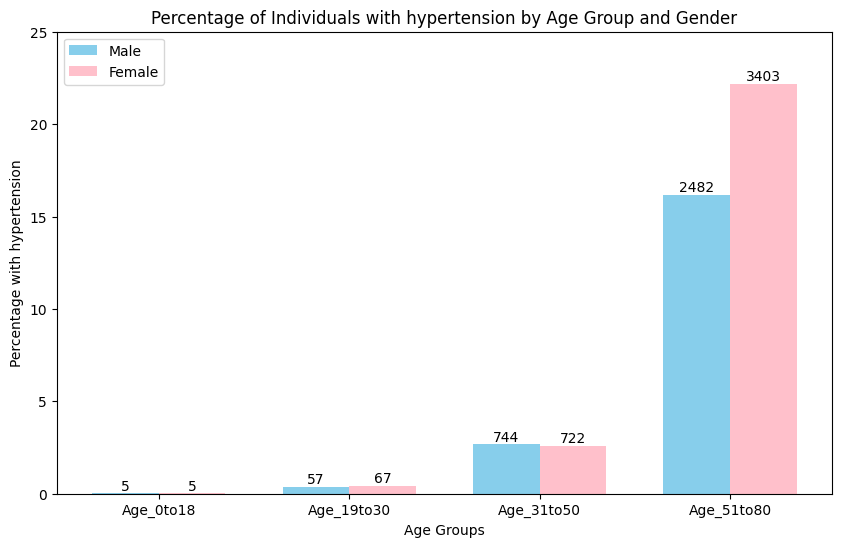

In [9]:

Age_0to18_male_hypertension_count = len(Age_0to18[(Age_0to18['gender'] == 'Male') & (Age_0to18['hypertension'] == 1)])
Age_0to18_female_hypertension_count = len(Age_0to18[(Age_0to18['gender'] == 'Female') & (Age_0to18['hypertension'] == 1)])
Age_0to18_male_total=len(Age_0to18['gender']=='Male')
Age_0to18_female_total=len(Age_0to18['gender']=='Female')
Age_0to18_male_hypertension_percent = (Age_0to18_male_hypertension_count / Age_0to18_male_total) * 100
Age_0to18_female_hypertension_percent = (Age_0to18_female_hypertension_count / Age_0to18_female_total) * 100

Age_19to30_male_hypertension_count = len(Age_19to30[(Age_19to30['gender'] == 'Male') & (Age_19to30['hypertension'] == 1)])
Age_19to30_female_hypertension_count = len(Age_19to30[(Age_19to30['gender'] == 'Female') & (Age_19to30['hypertension'] == 1)])
Age_19to30_male_total=len(Age_19to30['gender']=='Male')
Age_19to30_female_total=len(Age_19to30['gender']=='Female')
Age_19to30_male_hypertension_percent = (Age_19to30_male_hypertension_count / Age_19to30_male_total) * 100
Age_19to30_female_hypertension_percent = (Age_19to30_female_hypertension_count / Age_19to30_female_total) * 100

Age_31to50_male_hypertension_count = len(Age_31to50[(Age_31to50['gender'] == 'Male') & (Age_31to50['hypertension'] == 1)])
Age_31to50_female_hypertension_count = len(Age_31to50[(Age_31to50['gender'] == 'Female') & (Age_31to50['hypertension'] == 1)])
Age_31to50_male_total=len(Age_31to50['gender']=='Male')
Age_31to50_female_total=len(Age_31to50['gender']=='Female')
Age_31to50_male_hypertension_percent = (Age_31to50_male_hypertension_count / Age_31to50_male_total) * 100
Age_31to50_female_hypertension_percent = (Age_31to50_female_hypertension_count / Age_31to50_female_total) * 100

Age_51to80_male_hypertension_count = len(Age_51to80[(Age_51to80['gender'] == 'Male') & (Age_51to80['hypertension'] == 1)])
Age_51to80_female_hypertension_count = len(Age_51to80[(Age_51to80['gender'] == 'Female') & (Age_51to80['hypertension'] == 1)])
Age_51to80_male_total=len(Age_19to30['gender']=='Male')
Age_51to80_female_total=len(Age_19to30['gender']=='Female')
Age_51to80_male_hypertension_percent = (Age_51to80_male_hypertension_count / Age_51to80_male_total) * 100
Age_51to80_female_hypertension_percent = (Age_51to80_female_hypertension_count / Age_51to80_female_total) * 100

age_groups = ['Age_0to18', 'Age_19to30', 'Age_31to50', 'Age_51to80']
male_hypertension_percentages = [Age_0to18_male_hypertension_percent, Age_19to30_male_hypertension_percent, Age_31to50_male_hypertension_percent, Age_51to80_male_hypertension_percent]
female_hypertension_percentages = [Age_0to18_female_hypertension_percent, Age_19to30_female_hypertension_percent, Age_31to50_female_hypertension_percent, Age_51to80_female_hypertension_percent]
male_totals=[Age_0to18_male_hypertension_count ,Age_19to30_male_hypertension_count,Age_31to50_male_hypertension_count, Age_51to80_male_hypertension_count]
female_totals=[Age_0to18_female_hypertension_count,Age_19to30_female_hypertension_count,Age_31to50_female_hypertension_count,Age_51to80_female_hypertension_count]

bar_width = 0.35
index = np.arange(len(age_groups))

plt.figure(figsize=(10, 6))
bar1 = plt.bar(index - bar_width/2, male_hypertension_percentages, bar_width, color='skyblue', label='Male')
bar2 = plt.bar(index + bar_width/2, female_hypertension_percentages, bar_width, color='pink', label='Female')


for bars, totals in zip([bar1, bar2], [male_totals, female_totals]):
    for bar, total in zip(bars, totals):
        plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{total}', ha='center', va='bottom')

plt.xlabel('Age Groups')
plt.ylabel('Number of Individuals with hypertension')
plt.xlabel('Age Groups')
plt.ylabel('Percentage with hypertension')
plt.title('Percentage of Individuals with hypertension by Age Group and Gender')
plt.xticks(index, age_groups)
plt.legend()
plt.ylim(0, 25)
plt.show()

# Class Divison

In [169]:
diabetic=df[df['diabetes']==1]
Non_diabetic=df[df['diabetes']==0]


# Hot-Encoding 

In [171]:
X= df.drop('diabetes', axis='columns')
y= df.diabetes
smoking_dummies=pd.get_dummies(data=X['smoking_history']).astype(int)
X=X.merge(smoking_dummies,left_index=True,right_index=True)
gender_dummies=pd.get_dummies(data=X['gender']).astype(int)
X=X.merge(gender_dummies,left_index=True,right_index=True)  
X=X.drop(columns=['gender','smoking_history'],axis='columns')


# Ensembling Method 

In [293]:
def ensemble(df_majority,df_minority,start,end):
    df = pd.concat([df_majority[start:end], df_minority], axis=0)
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
    return X_train,X_test,y_train,y_test 

# Neural Network

In [299]:
class NeuralNetwork():
    def __init__(self, input_shape):
        self.input_shape = input_shape
        self.model = self.create_model()
    def create_model(self):
        
        model = keras.Sequential([
            keras.layers.Dense(100, input_shape=(self.input_shape,), activation='relu'),
            keras.layers.Dense(75, activation='leaky_relu'),
            keras.layers.Dense(50, activation='elu'),
            keras.layers.Dense(25, activation='tanh'),
            keras.layers.Dense(10, activation='softmax'),
            keras.layers.Dense(2, activation='sigmoid')
        ])
        model.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])
        return model

    def train_model(self, X_train, y_train, X_test, y_test):
        self.model.fit(X_train, y_train, epochs=5)
        test_loss, test_accuracy = self.model.evaluate(X_test, y_test)
        return test_loss,test_accuracy


# Evalution of data using nureal netwrok

In [300]:
models = {}

start_list = [0, 8500, 17000, 25000, 34000, 42500, 51000, 59500, 68000, 76500, 83000]
end_list = [8499, 16999, 24999, 33999, 42499, 50999, 59499, 67999, 76499, 84999, 91500]

for i, (start, end) in enumerate(zip(start_list, end_list)):
    X_train, X_test, y_train, y_test = ensemble(Non_diabetic, diabetic, start, end)
    nn = NeuralNetwork(X_train.shape[1])
    test_accuracy = nn.train_model(X_train, y_train, X_test, y_test)
    model_name = f'neural_network{i+1}'
    models[model_name] = (nn.model, test_accuracy)



Epoch 1/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 2s 468us/step - accuracy: 0.8828 - loss: 0.3870
Epoch 2/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step - accuracy: 0.9139 - loss: 0.2934
Epoch 3/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step - accuracy: 0.9142 - loss: 0.2928
Epoch 4/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 483us/step - accuracy: 0.9137 - loss: 0.2940
Epoch 5/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 459us/step - accuracy: 0.9146 - loss: 0.2919
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 261us/step - accuracy: 0.9156 - loss: 0.2895
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2094/2094 ━━━━━━━━━━━━━━━━━━━━ 2s 462us/step - accuracy: 0.9135 - loss: 0.3829
Epoch 2/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 478us/step - accuracy: 0.9156 - loss: 0.2896
Epoch 3/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 464us/step - accuracy: 0.9145 - loss: 0.2920
Epoch 4/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 531us/step - accuracy: 0.9124 - loss: 0.2969
Epoch 5/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step - accuracy: 0.9134 - loss: 0.2947
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 260us/step - accuracy: 0.9156 - loss: 0.2895
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2094/2094 ━━━━━━━━━━━━━━━━━━━━ 2s 464us/step - accuracy: 0.9121 - loss: 0.3786
Epoch 2/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - accuracy: 0.9160 - loss: 0.2884
Epoch 3/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 460us/step - accuracy: 0.9132 - loss: 0.2951
Epoch 4/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 458us/step - accuracy: 0.9152 - loss: 0.2903
Epoch 5/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 461us/step - accuracy: 0.9135 - loss: 0.2944
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 286us/step - accuracy: 0.9156 - loss: 0.2895
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2094/2094 ━━━━━━━━━━━━━━━━━━━━ 2s 479us/step - accuracy: 0.9150 - loss: 0.3576
Epoch 2/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 469us/step - accuracy: 0.9142 - loss: 0.2927
Epoch 3/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 489us/step - accuracy: 0.9126 - loss: 0.2966
Epoch 4/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - accuracy: 0.9139 - loss: 0.2934
Epoch 5/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 467us/step - accuracy: 0.9147 - loss: 0.2915
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 270us/step - accuracy: 0.9156 - loss: 0.2895
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2094/2094 ━━━━━━━━━━━━━━━━━━━━ 2s 496us/step - accuracy: 0.9149 - loss: 0.3671
Epoch 2/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 482us/step - accuracy: 0.9158 - loss: 0.2890
Epoch 3/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 470us/step - accuracy: 0.9147 - loss: 0.2915
Epoch 4/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 509us/step - accuracy: 0.9151 - loss: 0.2905
Epoch 5/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step - accuracy: 0.9170 - loss: 0.2860
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 266us/step - accuracy: 0.9156 - loss: 0.2895
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2094/2094 ━━━━━━━━━━━━━━━━━━━━ 3s 517us/step - accuracy: 0.8927 - loss: 0.3823
Epoch 2/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 486us/step - accuracy: 0.9142 - loss: 0.2927
Epoch 3/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 484us/step - accuracy: 0.9159 - loss: 0.2887
Epoch 4/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 480us/step - accuracy: 0.9132 - loss: 0.2952
Epoch 5/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 466us/step - accuracy: 0.9152 - loss: 0.2904
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 304us/step - accuracy: 0.9156 - loss: 0.2895
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2094/2094 ━━━━━━━━━━━━━━━━━━━━ 2s 490us/step - accuracy: 0.9030 - loss: 0.3802
Epoch 2/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 491us/step - accuracy: 0.9136 - loss: 0.2943
Epoch 3/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 472us/step - accuracy: 0.9143 - loss: 0.2925
Epoch 4/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.9165 - loss: 0.2873
Epoch 5/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step - accuracy: 0.9144 - loss: 0.2923
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 293us/step - accuracy: 0.9156 - loss: 0.2895
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2094/2094 ━━━━━━━━━━━━━━━━━━━━ 2s 468us/step - accuracy: 0.9096 - loss: 0.3670
Epoch 2/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.9155 - loss: 0.2896
Epoch 3/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - accuracy: 0.9142 - loss: 0.2926
Epoch 4/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 463us/step - accuracy: 0.9150 - loss: 0.2908
Epoch 5/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 485us/step - accuracy: 0.9135 - loss: 0.2943
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 259us/step - accuracy: 0.9156 - loss: 0.2895
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2094/2094 ━━━━━━━━━━━━━━━━━━━━ 2s 483us/step - accuracy: 0.9138 - loss: 0.3810
Epoch 2/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 471us/step - accuracy: 0.9147 - loss: 0.2917
Epoch 3/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 468us/step - accuracy: 0.9133 - loss: 0.2947
Epoch 4/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 462us/step - accuracy: 0.9137 - loss: 0.2940
Epoch 5/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 539us/step - accuracy: 0.9154 - loss: 0.2899
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 1s 381us/step - accuracy: 0.9156 - loss: 0.2895
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2094/2094 ━━━━━━━━━━━━━━━━━━━━ 2s 457us/step - accuracy: 0.9156 - loss: 0.3939
Epoch 2/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 456us/step - accuracy: 0.9162 - loss: 0.2881
Epoch 3/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 453us/step - accuracy: 0.9139 - loss: 0.2934
Epoch 4/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 452us/step - accuracy: 0.9152 - loss: 0.2903
Epoch 5/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.9155 - loss: 0.2897
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 255us/step - accuracy: 0.9156 - loss: 0.2895
Epoch 1/5


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/keras/src/layers/core/dense.py:88: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


2094/2094 ━━━━━━━━━━━━━━━━━━━━ 2s 456us/step - accuracy: 0.9150 - loss: 0.3564
Epoch 2/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 451us/step - accuracy: 0.9137 - loss: 0.2940
Epoch 3/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 487us/step - accuracy: 0.9138 - loss: 0.2936
Epoch 4/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 506us/step - accuracy: 0.9144 - loss: 0.2923
Epoch 5/5
2094/2094 ━━━━━━━━━━━━━━━━━━━━ 1s 477us/step - accuracy: 0.9151 - loss: 0.2906
1032/1032 ━━━━━━━━━━━━━━━━━━━━ 0s 279us/step - accuracy: 0.9156 - loss: 0.2895


In [301]:
print(models)

{'neural_network1': (<Sequential name=sequential_127, built=True>, (0.28915873169898987, 0.9156363606452942)), 'neural_network2': (<Sequential name=sequential_128, built=True>, (0.28915560245513916, 0.9156363606452942)), 'neural_network3': (<Sequential name=sequential_129, built=True>, (0.28917279839515686, 0.9156363606452942)), 'neural_network4': (<Sequential name=sequential_130, built=True>, (0.2891576886177063, 0.9156363606452942)), 'neural_network5': (<Sequential name=sequential_131, built=True>, (0.28920885920524597, 0.9156363606452942)), 'neural_network6': (<Sequential name=sequential_132, built=True>, (0.28917577862739563, 0.9156363606452942)), 'neural_network7': (<Sequential name=sequential_133, built=True>, (0.28921258449554443, 0.9156363606452942)), 'neural_network8': (<Sequential name=sequential_134, built=True>, (0.28916096687316895, 0.9156363606452942)), 'neural_network9': (<Sequential name=sequential_135, built=True>, (0.2891598045825958, 0.9156363606452942)), 'neural_net

# Random Forest and Decision Tree

In [306]:
class TreeModel:
    def __init__(self, model_type, **kwargs):
        if model_type == 'random_forest':
            self.model = RandomForestClassifier(**kwargs)
        elif model_type == 'decision_tree':
            self.model = DecisionTreeClassifier(**kwargs)
        else:
            raise ValueError("Model type must be 'random_forest' or 'decision_tree'")

    def train_and_evaluate(self, X_train, y_train, X_test, y_test):
        """Train the model and evaluate it on the test set."""
        self.model.fit(X_train, y_train)
        predictions = self.model.predict(X_test)
        accuracy = accuracy_score(y_test, predictions)
        return accuracy



# Evalution of data using Random Forest and Decision Tree

In [309]:
tree_models = {}

start_list = [0, 8500, 17000, 25000, 34000, 42500, 51000, 59500, 68000, 76500, 83000]
end_list = [8499, 16999, 24999, 33999, 42499, 50999, 59499, 67999, 76499, 84999, 91500]

for i, (start, end) in enumerate(zip(start_list, end_list)):
    X_train, X_test, y_train, y_test = ensemble(Non_diabetic, diabetic, start, end)

    y_train = y_train.astype(int)
    y_test = y_test.astype(int)

    # Random Forest Model
    rf_model = TreeModel('random_forest', n_estimators=100, max_depth=10)
    rf_accuracy = rf_model.train_and_evaluate( X_train, y_train, X_test, y_test)
    rf_model_name = f'random_forest{i+1}'
    tree_models[rf_model_name] = (rf_model.model, rf_accuracy)


    # Decision Tree Model
    dt_model = TreeModel('decision_tree', max_depth=10)
    dt_accuracy = dt_model.train_and_evaluate(X_train, y_train, X_test, y_test)
    dt_model_name = f'decision_tree{i+1}'
    tree_models[dt_model_name] = (dt_model.model, dt_accuracy)


In [310]:
print(tree_models)

{'random_forest1': (RandomForestClassifier(max_depth=10), 0.9718484848484849), 'decision_tree1': (DecisionTreeClassifier(max_depth=10), 0.971030303030303), 'random_forest2': (RandomForestClassifier(max_depth=10), 0.9718484848484849), 'decision_tree2': (DecisionTreeClassifier(max_depth=10), 0.971), 'random_forest3': (RandomForestClassifier(max_depth=10), 0.9718181818181818), 'decision_tree3': (DecisionTreeClassifier(max_depth=10), 0.971), 'random_forest4': (RandomForestClassifier(max_depth=10), 0.9718181818181818), 'decision_tree4': (DecisionTreeClassifier(max_depth=10), 0.971), 'random_forest5': (RandomForestClassifier(max_depth=10), 0.9718484848484849), 'decision_tree5': (DecisionTreeClassifier(max_depth=10), 0.971), 'random_forest6': (RandomForestClassifier(max_depth=10), 0.9718484848484849), 'decision_tree6': (DecisionTreeClassifier(max_depth=10), 0.971030303030303), 'random_forest7': (RandomForestClassifier(max_depth=10), 0.9718484848484849), 'decision_tree7': (DecisionTreeClassifi